<a href="https://colab.research.google.com/github/gabrielcz6/supermarketsalesanalysis/blob/main/supermarketanalisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Variables**

In [124]:
df_ventas, df_ventas_limpio="",""

**Librerías**

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

**Obtención de Datos**

Obtención de datos

Crea una función obtencion_datos(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

Obtención de los datos: Con la ayuda del método read_csv carga tu archivo "reporte_ventas.csv" dentro de la variable global df_ventas.

Formatar columnas de fechas: Con la ayuda del método pd.to_datetime transforma las columnas 'fecha_pedido' y 'fecha_envio' que se encuentran como_ texto a formato datetime_ usando el siguiente formato format='%Y-%m-%d'.

Elimina Repetidos: Elimina todos los registros duplicados con el método drop_duplicates() y guarda el resultado en la variable global df_ventas_limpio.

Elimina filas con registros de prueba de la base: Elimina todos los registros cuyo valor sea igual a 'prueba' en la columna 'nombre_cliente', continúa guardando el resultado en df_ventas_limpio.

Elimina filas con valor nulo en la columna nombre_cliente: Elimina todos los registros cuyo valor sea nulo en la columna 'nombre_cliente', continúa guardando el resultado en df_ventas_limpio.

Filtra operaciones sin ganancia: Quédate sólo con los registros que tengan un valor mayor a cero en la columna 'total_ganancia', continúa guardando el resultado en df_ventas_limpio.

Actualiza el indice: Utilizando el método reset_index actualiza el índice del dataframe final df_ventas_limpio.



In [126]:
def obtencion_datos():
    global df_ventas
    df_ventas = pd.read_csv("reporte_ventas.csv")
    print("Datos obtenidos:")
    print(df_ventas.head())

def formatear_columnas_fechas():
    global df_ventas
    df_ventas['fecha_pedido'] = pd.to_datetime(df_ventas['fecha_pedido'], format='%Y-%m-%d')
    df_ventas['fecha_envio'] = pd.to_datetime(df_ventas['fecha_envio'], format='%Y-%m-%d')
    print("Columnas de fechas formateadas:")
    print(df_ventas.head())

def eliminar_repetidos():
    global df_ventas_limpio
    df_ventas_limpio = df_ventas.drop_duplicates()
    print("Repetidos eliminados:")
    print(df_ventas_limpio.head())

def eliminar_filas():
    global df_ventas_limpio
    df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['nombre_cliente'] != 'prueba']
    print("Filas con 'prueba' eliminadas:")
    print(df_ventas_limpio.head())

def eliminar_registros_nulos():
    global df_ventas_limpio
    df_ventas_limpio = df_ventas_limpio.dropna(subset=['nombre_cliente'])
    print("Registros nulos eliminados:")
    print(df_ventas_limpio.head())

def filtrar_operaciones_con_ganancia():
    global df_ventas_limpio
    df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['total_ganancia'] > 0]
    print("Operaciones sin ganancia filtradas:")
    print(df_ventas_limpio.head())

def resetear_indice():
    global df_ventas_limpio
    df_ventas_limpio = df_ventas_limpio.reset_index(drop=True)
    print("Índice reseteado:")
    print(df_ventas_limpio.head())

obtencion_datos()
formatear_columnas_fechas()
eliminar_repetidos()
eliminar_filas()
eliminar_registros_nulos()
filtrar_operaciones_con_ganancia()
resetear_indice()

print('Información')
print(df_ventas.info())
print('------------')
print('Duplicados:')
print(df_ventas.duplicated().sum())
print('------------')
print('Registros de prueba:')
print((df_ventas['nombre_cliente'] == 'prueba').sum())
print('------------')
print('Registros con ganancia <=0:')
print((df_ventas['total_ganancia'] <= 0).sum())


obtencion_datos()
print('información:')
print(df_ventas_limpio.info())
print('------------')
print(df_ventas_limpio.duplicated().sum())
print('------------')
print('registros de prueba:')
print((df_ventas_limpio['nombre_cliente'] == 'prueba').sum ())
print('------------')
print('registros con ganancia <=0:')
print((df_ventas_limpio['total_ganancia'] <= 0).sum ())


Datos obtenidos:
  fecha_pedido fecha_envio        modo_envio     nombre_cliente  \
0   2021-11-09  2021-11-12         Económico    Thiago Silveira   
1   2021-11-09  2021-11-12         Económico    Thiago Silveira   
2   2021-06-13  2021-06-17         Económico      Giovanna Lima   
3   2020-10-12  2020-10-19  Entrega estándar  Ana Júlia da Cruz   
4   2020-10-12  2020-10-19  Entrega estándar  Ana Júlia da Cruz   

  segmento_cliente          ciudad          estado   region  \
0              B2C  Ribeirão Preto       São Paulo  Sureste   
1              B2C  Ribeirão Preto       São Paulo  Sureste   
2              B2B  Rio de Janeiro  Rio de Janeiro  Sureste   
3              B2C   Foz do Iguaçu          Paraná      Sur   
4              B2C   Foz do Iguaçu          Paraná      Sur   

   departamento_producto             tipo_producto  precio_base  \
0                   Ropa                 Camisetas       409.70   
1                   Ropa                     Jeans       705.10   


**Pregunta 1**

      total_venta   año
0          890.66  2021
1         2488.59  2021
2           49.72  2021
3           76.04  2020
4          166.11  2019
...           ...   ...
7205       123.22  2021
7206       271.97  2022
7207       700.75  2022
7208        85.83  2019
7209       826.74  2022

[7210 rows x 2 columns]
    año  total_venta
0  2019   1052735.86
1  2020   1190541.40
2  2021   1535801.44
3  2022   1825927.50


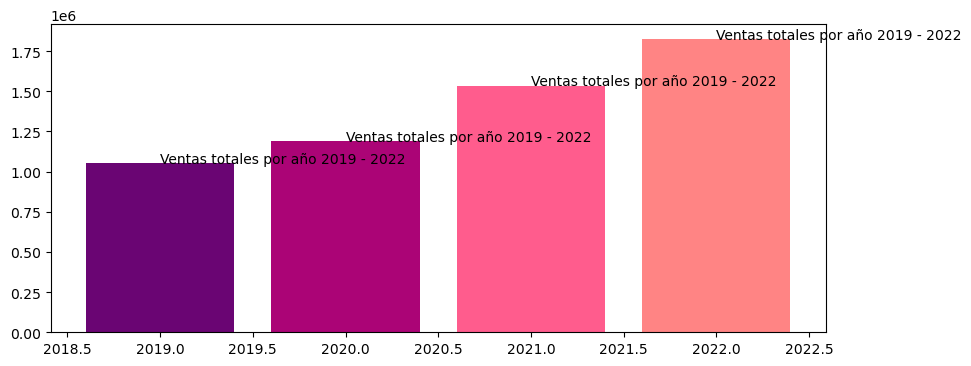

In [127]:
def pregunta_1():
    global df_ventas
    global df_ventas_año
    global df_ventas_limpio
    global df_ventas_año_agrupado

    df_ventas_año=df_ventas_limpio[['fecha_pedido', 'total_venta']].copy()

   # Crea una nueva columna llamada 'año' con el año de 'fecha_pedido'
    df_ventas_año['año'] = df_ventas_año['fecha_pedido'].dt.year

    # Elimina la columna 'fecha_pedido'
    df_ventas_año = df_ventas_año.drop('fecha_pedido', axis=1)

    # Muestra el DataFrame resultante
    print(df_ventas_año)

    df_ventas_año_agrupado = df_ventas_año.groupby('año').aggregate({'total_venta': 'sum'}).reset_index()

    # Muestra el DataFrame resultante
    print(df_ventas_año_agrupado)
    fig, ax = plt.subplots(figsize=(10,4))
    ax.bar(df_ventas_año_agrupado["año"], df_ventas_año_agrupado["total_venta"], color=colores, width=0.8)
    for bar in ax.patches:
      valor = bar.get_height()
      qtd = "Ventas totales por año 2019 - 2022"
      ax.text(bar.get_x() + bar.get_width() / 2.0, valor, qtd)
      
# Colores para las barras
colores = ['#6a0573', '#ab0476', '#ff5c8d', '#ff8484', '#ffc75f']

pregunta_1()

**Pregunta 2**

In [128]:
def pregunta_2():
    global df_ventas_limpio
    global df_top_ganancias

    # Crear una copia de df_ventas_limpio con solo las columnas 'tipo_producto' y 'total_ganancia'
    df_top_ganancias = df_ventas_limpio[['tipo_producto', 'total_ganancia']].copy()

    # Agrupar por 'tipo_producto', sumarizar 'total_ganancia' y ordenar los resultados
    df_top_ganancias = df_top_ganancias.groupby('tipo_producto').aggregate({'total_ganancia': 'sum'}).sort_values('total_ganancia', ascending=False)

    # Seleccionar los primeros 7 registros
    df_top_ganancias = df_top_ganancias.head(7)


pregunta_2()

print(df_top_ganancias)

                       total_ganancia
tipo_producto                        
Lámparas LED                111453.41
Laptops                      91148.67
Cámaras digitales            80192.63
Smartphones                  64705.58
Jeans                        55982.95
Detergente para ropas        55766.39
Bolsas de basura             53328.46


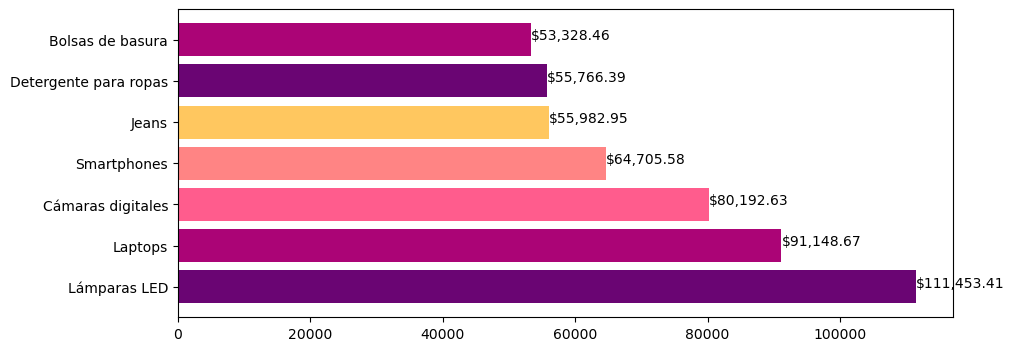

In [129]:
# Colores para las barras
colores = ['#6a0573', '#ab0476', '#ff5c8d', '#ff8484', '#ffc75f']

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 4))

# Crear el gráfico de barras horizontal
ax.barh(df_top_ganancias.index, df_top_ganancias['total_ganancia'], color=colores, align='center')

# Colocar los valores sobre cada barra
for i, valor in enumerate(df_top_ganancias['total_ganancia']):
    qtd = f'${valor:,.2f}'  # Formatea el valor como texto con símbolo de dólar y dos decimales
    ax.text(valor, i, qtd)

# Mostrar el gráfico
plt.show()

**Pregunta 3**

region  Centro-Oeste    Noreste      Norte        Sur    Sureste
año                                                             
2019        67406.37  346407.40   71778.74   44189.84  522953.51
2020        90616.80  282431.39  107309.38   61451.04  648732.79
2021       125344.52  359829.92   69534.02  110198.47  870894.51
2022        97679.64  549254.20   99195.86   99393.36  980404.44


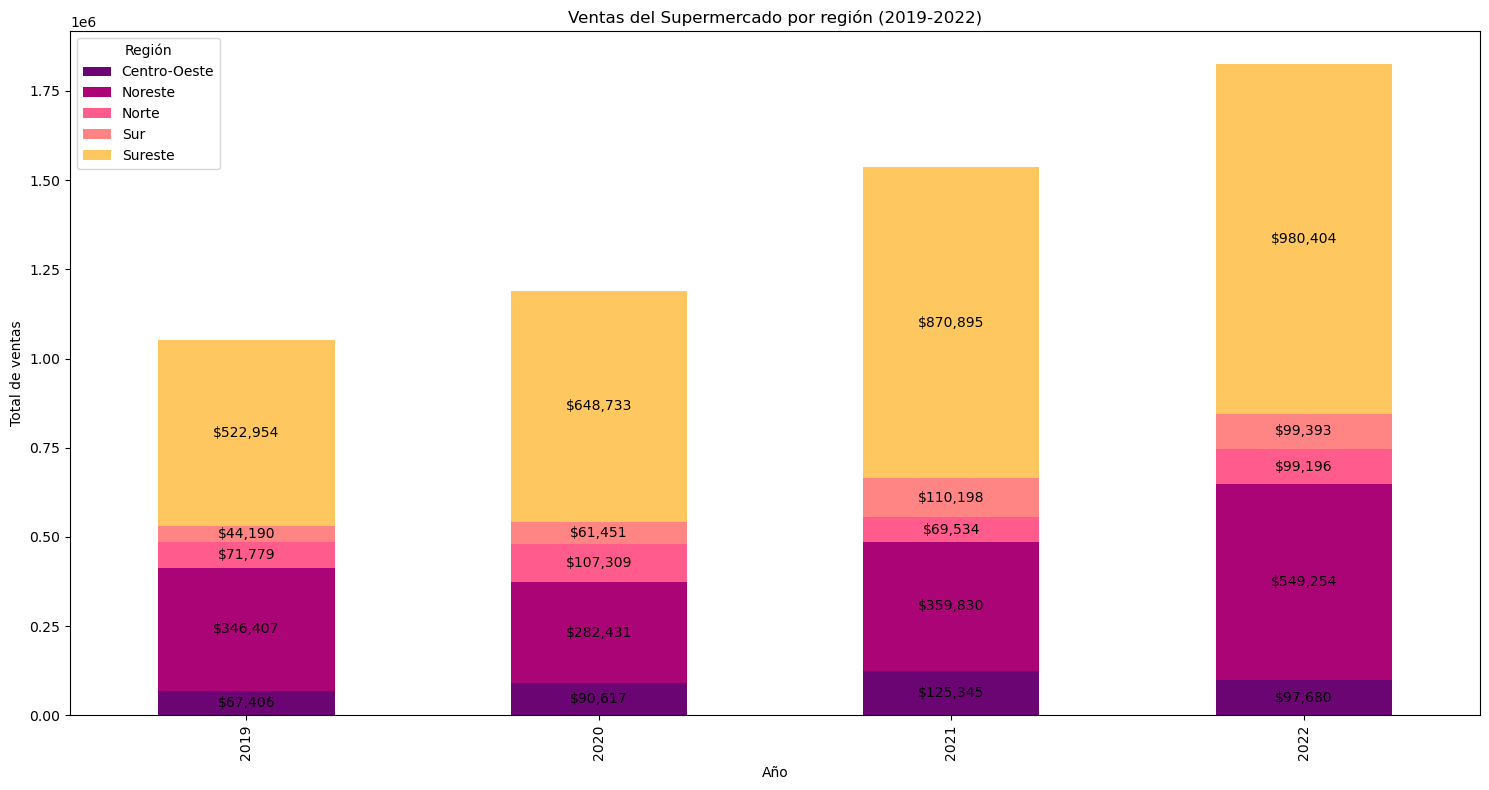

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

def pregunta_3():
    # Definir las variables globales según las instrucciones
    global df_ventas, df_ventas_limpio

    # Convertir 'fecha_pedido' a datetime si aún no se ha hecho
    df_ventas_limpio['fecha_pedido'] = pd.to_datetime(df_ventas_limpio['fecha_pedido'])

    # 1. Preparación de los datos
    # Crear una copia de df_ventas_limpio con solo las columnas especificadas
    df_ventas_año_region = df_ventas_limpio[['fecha_pedido', 'region', 'total_venta']].copy()
    # Crear una nueva columna 'año' con solo el año de 'fecha_pedido'
    df_ventas_año_region['año'] = df_ventas_año_region['fecha_pedido'].dt.year
    # Eliminar la columna 'fecha_pedido'
    df_ventas_año_region.drop('fecha_pedido', axis=1, inplace=True)
    # Generar una tabla pivotante
    df_ventas_año_region = pd.crosstab(index=df_ventas_año_region['año'],
                                        columns=df_ventas_año_region['region'],
                                        values=df_ventas_año_region['total_venta'],
                                        aggfunc='sum')
    print(df_ventas_año_region)
    # 2. Visualización
    # Definir los colores para el gráfico de barras apiladas
    colores = ['#6a0573', '#ab0476', '#ff5c8d', '#ff8484', '#ffc75f']
    # Crear el gráfico de barras apiladas
    ax = df_ventas_año_region.plot(kind='bar', stacked=True, figsize=(15, 8), color=colores)
    # Añadir etiquetas a cada segmento
    for container in ax.containers:
        # Convertir a texto y añadir el símbolo de $ al principio
        labels = [f"${v:,.0f}" for v in container.datavalues]
        ax.bar_label(container, label_type='center', labels=labels)
    # Personalizar la gráfica con opciones adicionales según su imaginación
    plt.title('Ventas del Supermercado por región (2019-2022)')
    plt.xlabel('Año')
    plt.ylabel('Total de ventas')
    plt.legend(title='Región')
    plt.tight_layout()
    # Mostrar la gráfica
    plt.show()

# Llamar a la función pregunta_3 para ejecutar el código
pregunta_3()


**Pregunta 4**

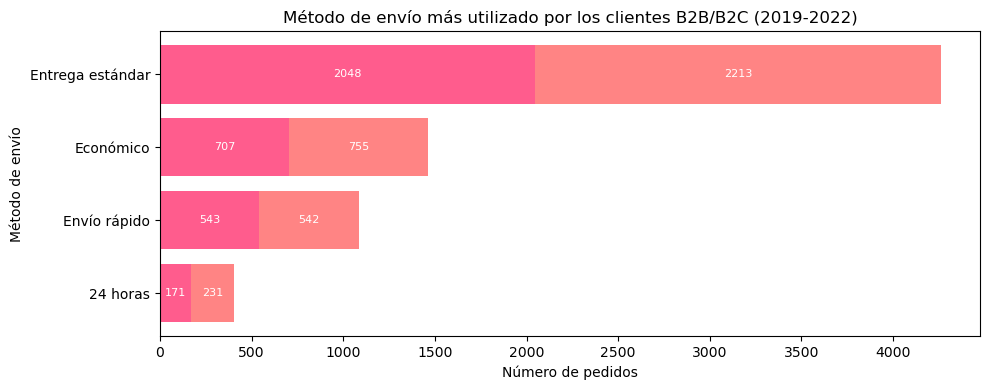

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

# Define las variables globales
global df_ventas, df_ventas_limpio


def pregunta_4():
    global df_ventas, df_ventas_limpio
    
    # Preparación de los datos
    df_modo_envio = df_ventas_limpio[['modo_envio', 'segmento_cliente']].copy()
    
    # Generar la tabla cruzada
    df_modo_envio = pd.crosstab(index=df_modo_envio['modo_envio'], columns=df_modo_envio['segmento_cliente']).sort_values("B2B")

    # Visualización
    colores = ['#6a0573', '#ab0476', '#ff5c8d', '#ff8484', '#ffc75f']
    fig, ax = plt.subplots(figsize=(10, 4))
    
    # Crear el gráfico de barras horizontal con colores específicos
    ax.barh(df_modo_envio.index, df_modo_envio['B2B'], color=colores[2])
    ax.barh(df_modo_envio.index, df_modo_envio['B2C'], left=df_modo_envio['B2B'], color=colores[3])

    # Colocar etiquetas dentro de cada segmento
    for i, container in enumerate(ax.containers):
        labels = [f'{v.get_width()}' if v.get_width() > 0 else '' for v in container]
        ax.bar_label(container, label_type='center', labels=labels, color='white', fontsize=8)

    # Establecer título y etiquetas de ejes
    ax.set_title('Método de envío más utilizado por los clientes B2B/B2C (2019-2022)')
    ax.set_xlabel('Número de pedidos')
    ax.set_ylabel('Método de envío')

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Llamamos a la función para ejecutarla y visualizar el gráfico
pregunta_4()


**Pregunta 5**

C:\Users\ferna\AppData\Local\Temp\ipykernel_4172\3629144776.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ventas_sp['fecha_pedido'] = pd.to_datetime(df_ventas_sp['fecha_pedido'])


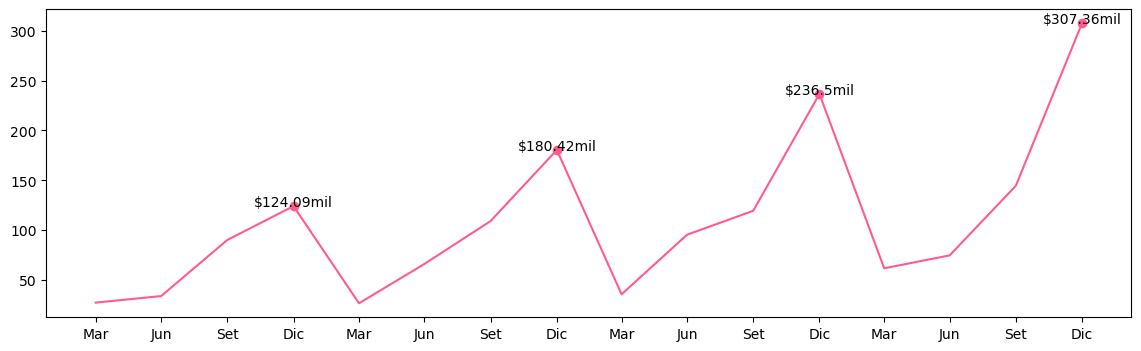

,fecha_pedido,total_venta
0,2019-03-31,27.38
1,2019-06-30,33.95
2,2019-09-30,90.21
3,2019-12-31,124.09
4,2020-03-31,26.73
5,2020-06-30,66.15
6,2020-09-30,109.18
7,2020-12-31,180.42
8,2021-03-31,35.74
9,2021-06-30,95.44


In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

global df_ventas, df_ventas_limpio

def pregunta_5():
    global df_ventas, df_ventas_limpio
    
    # Preparación de los datos
    # Seleccionamos solo las filas correspondientes al estado de São Paulo
    df_ventas_sp = df_ventas_limpio[df_ventas_limpio['estado'] == 'São Paulo']
    
    # Convertimos 'fecha_pedido' a datetime y lo establecemos como índice
    df_ventas_sp['fecha_pedido'] = pd.to_datetime(df_ventas_sp['fecha_pedido'])
    df_ventas_sp.set_index('fecha_pedido', inplace=True)
    
    # Nos aseguramos de no incluir ninguna columna no numérica en la operación de suma
    # Solo sumamos la columna 'total_venta'
    df_ventas_trimestrales = df_ventas_sp[['total_venta']].resample('Q').sum()
    
    # Convertimos 'total_venta' a escala de miles y redondeamos
    df_ventas_trimestrales['total_venta'] = (df_ventas_trimestrales['total_venta'] / 1000).round(2)
    
    # Reseteamos el índice para usarlo en la visualización
    df_ventas_trimestrales.reset_index(inplace=True)
    
    # Visualización
    fig, ax = plt.subplots(figsize=(14,4))
    
    # Configuramos los puntos para marcar en el gráfico (solo los puntos del 4to trimestre)
    puntos_a_marcar = [True if (i+1) % 4 == 0 else False for i in range(len(df_ventas_trimestrales))]

    # Dibujamos el gráfico de líneas con el color deseado
    ax.plot(df_ventas_trimestrales['fecha_pedido'], df_ventas_trimestrales['total_venta'],
            marker="o", markevery=puntos_a_marcar, color="#ff5c8d")

    # Establecemos etiquetas personalizadas para el eje X
    x_labels = ["Mar", "Jun", "Set", "Dic"] * (len(df_ventas_trimestrales) // 4)
    ax.set_xticks(df_ventas_trimestrales['fecha_pedido'])
    ax.set_xticklabels(x_labels, ha="center")

    # Colocamos las etiquetas de valor solo en los puntos del 4to trimestre
    for i in range(3, len(df_ventas_trimestrales), 4):
        ax.text(df_ventas_trimestrales['fecha_pedido'][i], df_ventas_trimestrales['total_venta'][i] + 0.02,
                f"${df_ventas_trimestrales['total_venta'][i]}mil", ha='center')

    # Mostramos el gráfico
    plt.show()
    return df_ventas_trimestrales

# Llamamos a la función para probarla y mostramos los resultados
df_ventas_trimestrales = pregunta_5()
df_ventas_trimestrales
